# 1. Defaine The Problem

## Flight Fare prediction using machine learning
##### In this article, we will be analyzing the flight fare dataset using essential exploratory data analysis techniques then will draw some predictions about the price of the flight based on some features such as what type of airline it is, what is the arrival time, what is the departure time, what is the duration of the flight, source, destination and more.

## Flight Price Prediction(EDA + Feature Engineering)

## Importing Labraries

In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [454]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [455]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [456]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Exploratory Data Analysis (EDA)  
#### Now here we will be looking at the kind of columns our dataset has.

In [457]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [458]:
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [459]:
train_df.shape

(10683, 11)

### To know more about dataset

In [460]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [461]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [462]:
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [463]:
# Now while using the isnull function and sum function we will gonna see about the number of null values in our dataset

train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [464]:
train_df.dropna(inplace=True)

In [465]:
train_df[train_df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [466]:
# Here we romove all duplicate and keep one
train_df.drop_duplicates(keep='first',inplace=True)

In [467]:
train_df.shape

(10462, 11)

In [468]:
test_df.isnull().sum()
# Here We no need to use dropna() method because we can see bellow there is no null value present in this data set.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## Data Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_24092\2524523741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline',y='Price',data=train_df.sort_values('Price',ascending=False),palette='plasma')


<Axes: xlabel='Airline', ylabel='Price'>

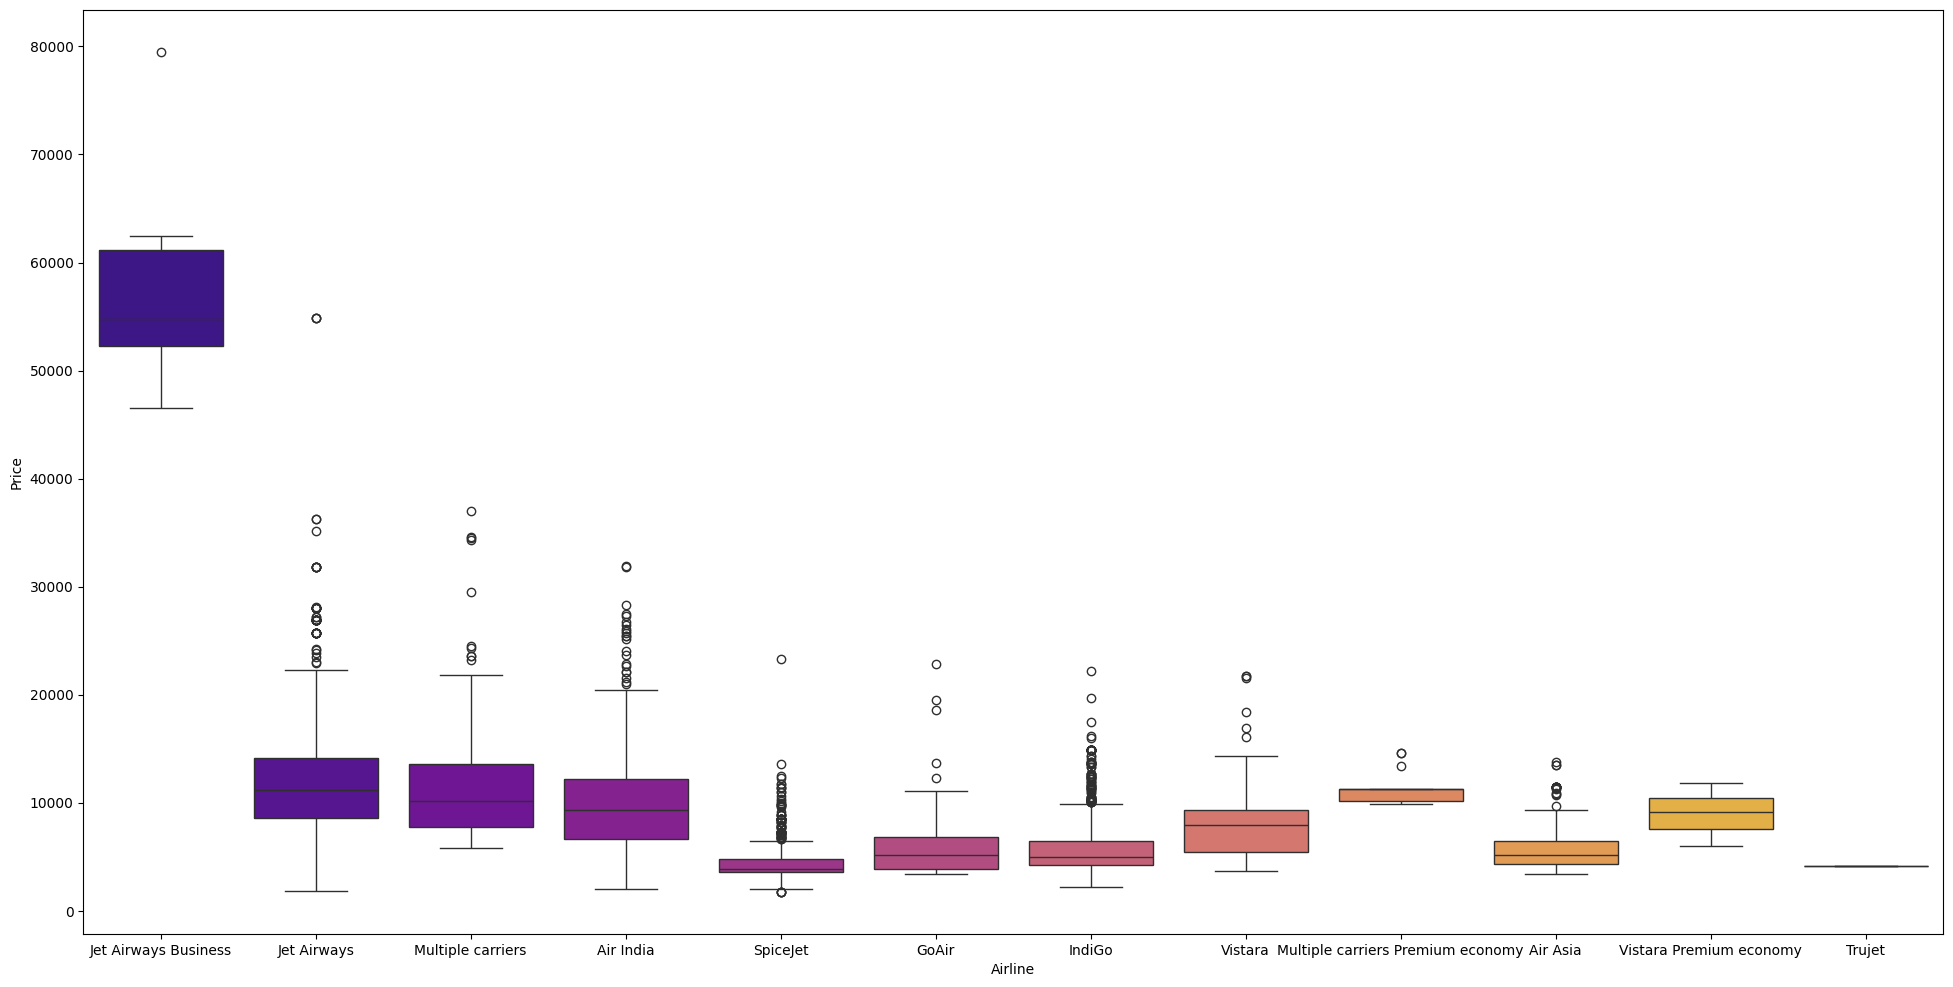

In [469]:
plt.figure(figsize=(24,12))
sns.boxplot(x='Airline',y='Price',data=train_df.sort_values('Price',ascending=False),palette='plasma')


### Observation:
* Here We drew the boxplot to understand the outlier of price which Airline has. 
* here most outlier price for jet Airways

C:\Users\DELL\AppData\Local\Temp\ipykernel_24092\2538225791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Source',y='Price',data=train_df.sort_values('Price',ascending=False),palette='Set1')


<Axes: xlabel='Source', ylabel='Price'>

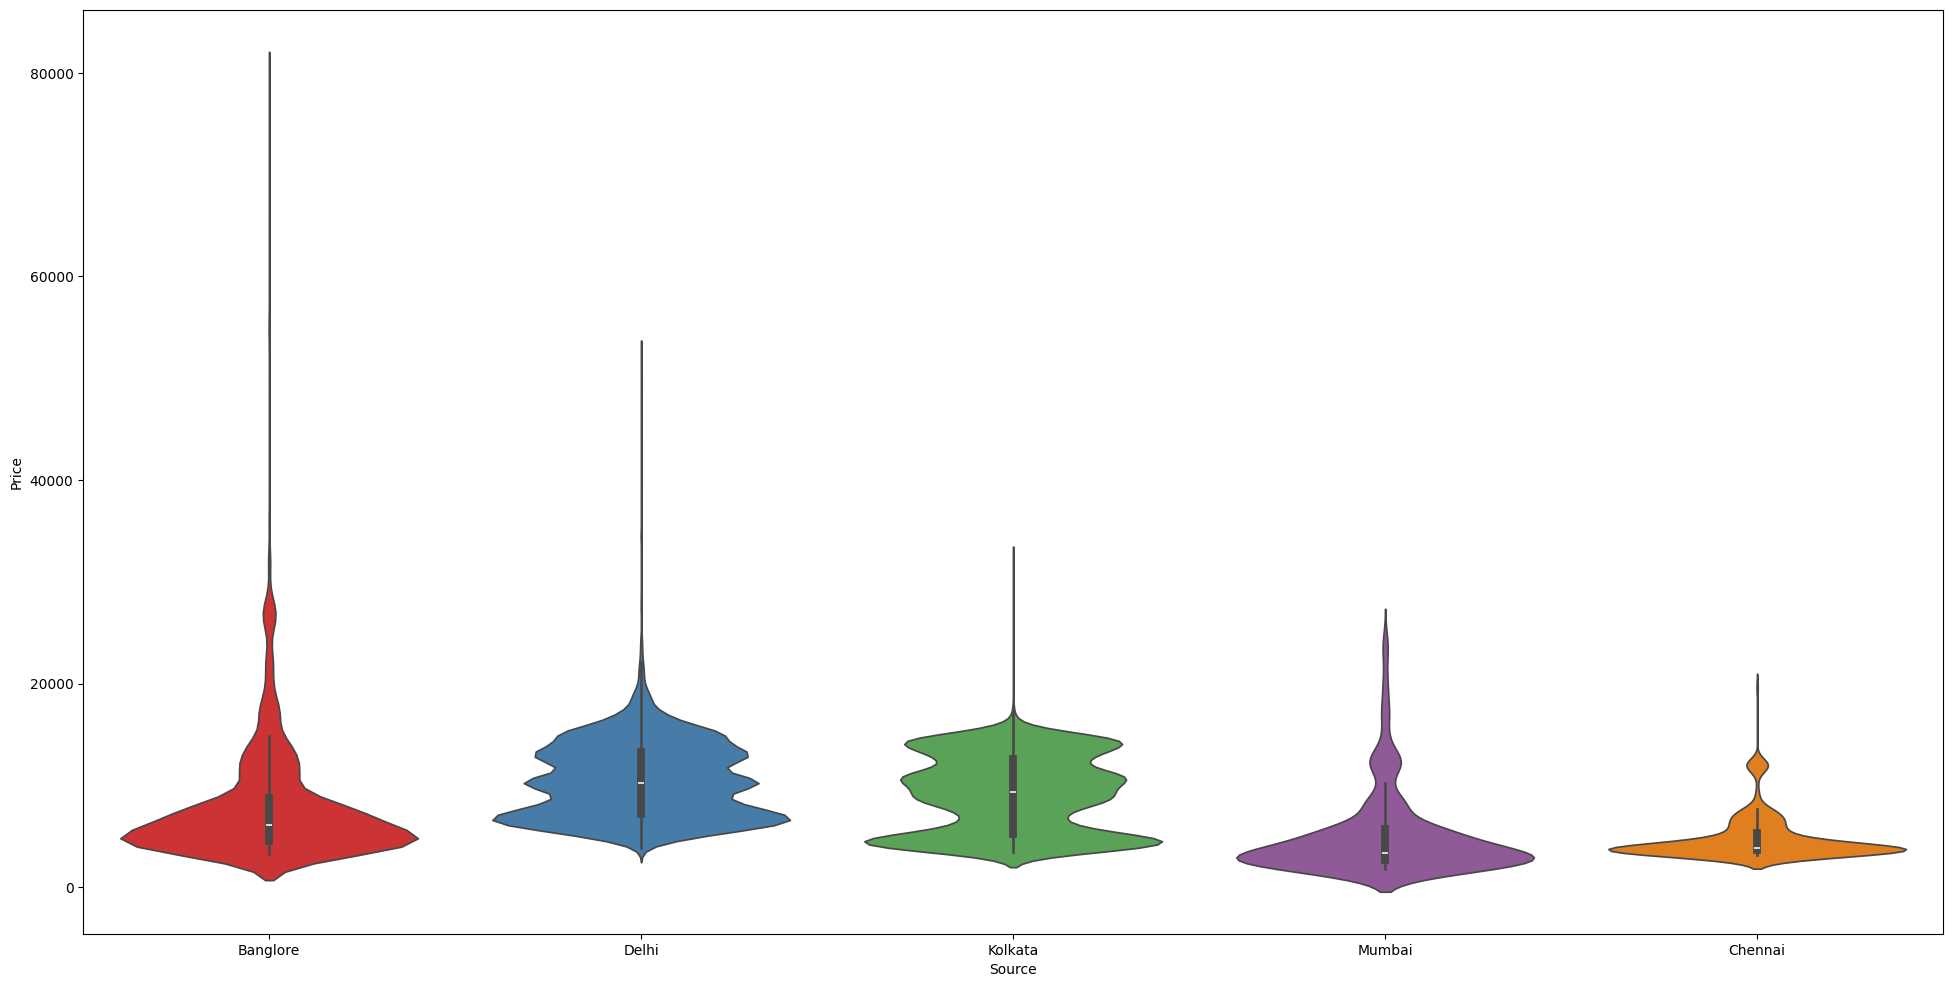

In [470]:
plt.figure(figsize=(24,12))
sns.violinplot(x='Source',y='Price',data=train_df.sort_values('Price',ascending=False),palette='Set1')

### Observation
* Here most outlier price is in Banglore and least is in Chennai.

In [471]:
## WE compine the train and test data set because we easly to clean
final_df=pd.concat([train_df,test_df],ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_24092\3274297695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Destination',y='Price',data=train_df.sort_values('Price',ascending=False),kind='box',height=3,aspect=3,palette='Set1')


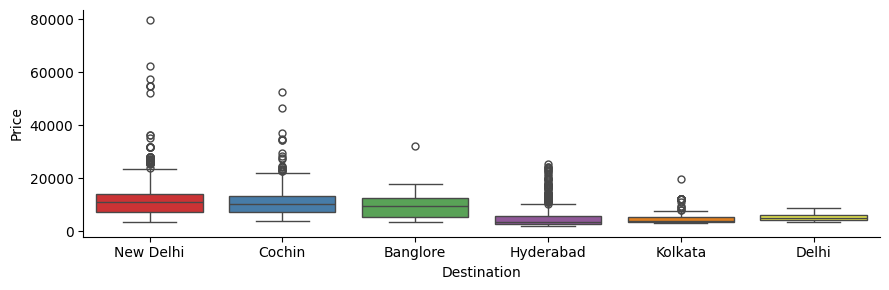

In [472]:
# Plotting Box plot for Price vs Destination
sns.catplot(x='Destination',y='Price',data=train_df.sort_values('Price',ascending=False),kind='box',height=3,aspect=3,palette='Set1')

### inference:
##### We plot with Price and Destination of flight travel using box plot , Here We can understand New Delhi has the most outlier prica and Kolkata has least 

In [473]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [474]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13133 entries, 0 to 13132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13133 non-null  object 
 1   Date_of_Journey  13133 non-null  object 
 2   Source           13133 non-null  object 
 3   Destination      13133 non-null  object 
 4   Route            13133 non-null  object 
 5   Dep_Time         13133 non-null  object 
 6   Arrival_Time     13133 non-null  object 
 7   Duration         13133 non-null  object 
 8   Total_Stops      13133 non-null  object 
 9   Additional_Info  13133 non-null  object 
 10  Price            10462 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


### Fetaure Engineering Process
Here We create new column name 'Date' ,Month' 'Year' using existing 'column Date_of_journey'

In [475]:
final_df['Date ']=final_df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
final_df['Month']=final_df['Date_of_Journey'].apply(lambda x:x.split('/')[1])
final_df['Year']=final_df['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [476]:
final_df['Date '].head()

0    24
1     1
2     9
3    12
4    01
Name: Date , dtype: object

In [477]:
final_df['Month'].head()


0    03
1    05
2    06
3    05
4    03
Name: Month, dtype: object

In [478]:
final_df['Year'].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: Year, dtype: object

In [479]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13133 entries, 0 to 13132
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13133 non-null  object 
 1   Date_of_Journey  13133 non-null  object 
 2   Source           13133 non-null  object 
 3   Destination      13133 non-null  object 
 4   Route            13133 non-null  object 
 5   Dep_Time         13133 non-null  object 
 6   Arrival_Time     13133 non-null  object 
 7   Duration         13133 non-null  object 
 8   Total_Stops      13133 non-null  object 
 9   Additional_Info  13133 non-null  object 
 10  Price            10462 non-null  float64
 11  Date             13133 non-null  object 
 12  Month            13133 non-null  object 
 13  Year             13133 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.4+ MB


### We have to convert into integer

In [480]:

final_df['Date ']=final_df['Date '].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [481]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13133 entries, 0 to 13132
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13133 non-null  object 
 1   Date_of_Journey  13133 non-null  object 
 2   Source           13133 non-null  object 
 3   Destination      13133 non-null  object 
 4   Route            13133 non-null  object 
 5   Dep_Time         13133 non-null  object 
 6   Arrival_Time     13133 non-null  object 
 7   Duration         13133 non-null  object 
 8   Total_Stops      13133 non-null  object 
 9   Additional_Info  13133 non-null  object 
 10  Price            10462 non-null  float64
 11  Date             13133 non-null  int32  
 12  Month            13133 non-null  int32  
 13  Year             13133 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.3+ MB


##### We already the column coverted into three column that's why we can remove the column 'Date_of_Journey'

In [482]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [483]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


C:\Users\DELL\AppData\Local\Temp\ipykernel_24092\1351930252.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month',data=final_df,palette=mycolors)


<Axes: title={'center': 'Number of Flight In Each Month'}, xlabel='Month', ylabel='Count'>

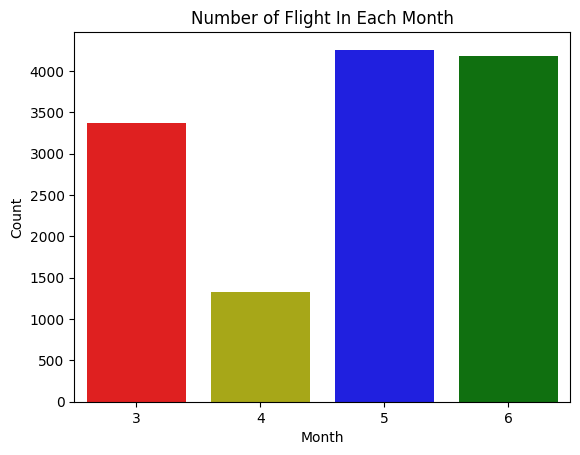

In [484]:
plt.title('Number of Flight In Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
mycolors=['r','y','b','g']
sns.countplot(x='Month',data=final_df,palette=mycolors)

### Inference
##### Here We can understand May has most number of flight 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

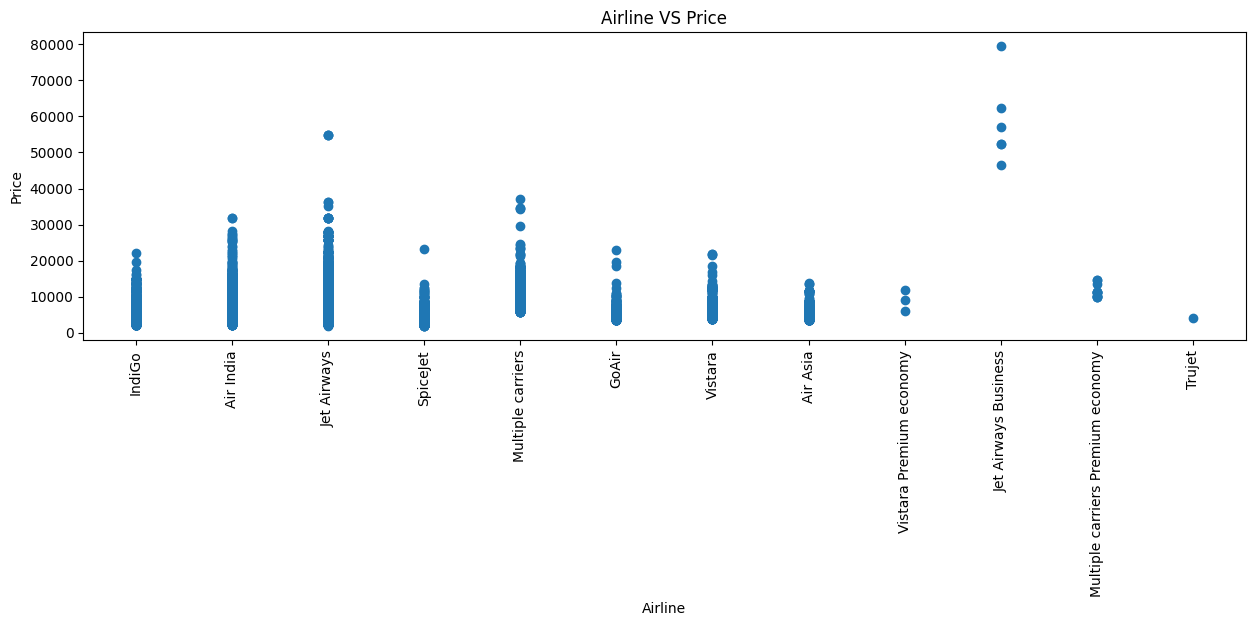

In [485]:
#ploting Airline and Price
plt.figure(figsize=(15,4))
plt.title('Airline VS Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.scatter(train_df['Airline'],train_df['Price'])
plt.xticks(rotation=90)

### Inference:
##### Here We can Jet Airways Business has most price outlier and least is Trujet

In [486]:
#Apply feature engneering to 'Arrival_Time' column
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
#from like this value 01:10 22 Mar,13:15 , we select only this values 01:10,13:15

In [487]:
final_df['Arrival_Time'].head()

0    01:10
1    13:15
2    04:25
3    23:30
4    21:35
Name: Arrival_Time, dtype: object

### Which column has null value

In [488]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [489]:
# we create seperate columns'Arrival_hour' and 'Arrival_minute'
final_df['Arrival_hour']=final_df['Arrival_Time'].apply(lambda x:x.split(':')[0])
final_df['Arrival_minute']=final_df['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [490]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


C:\Users\DELL\AppData\Local\Temp\ipykernel_24092\1034595946.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Airline',data=final_df,palette='Set1')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

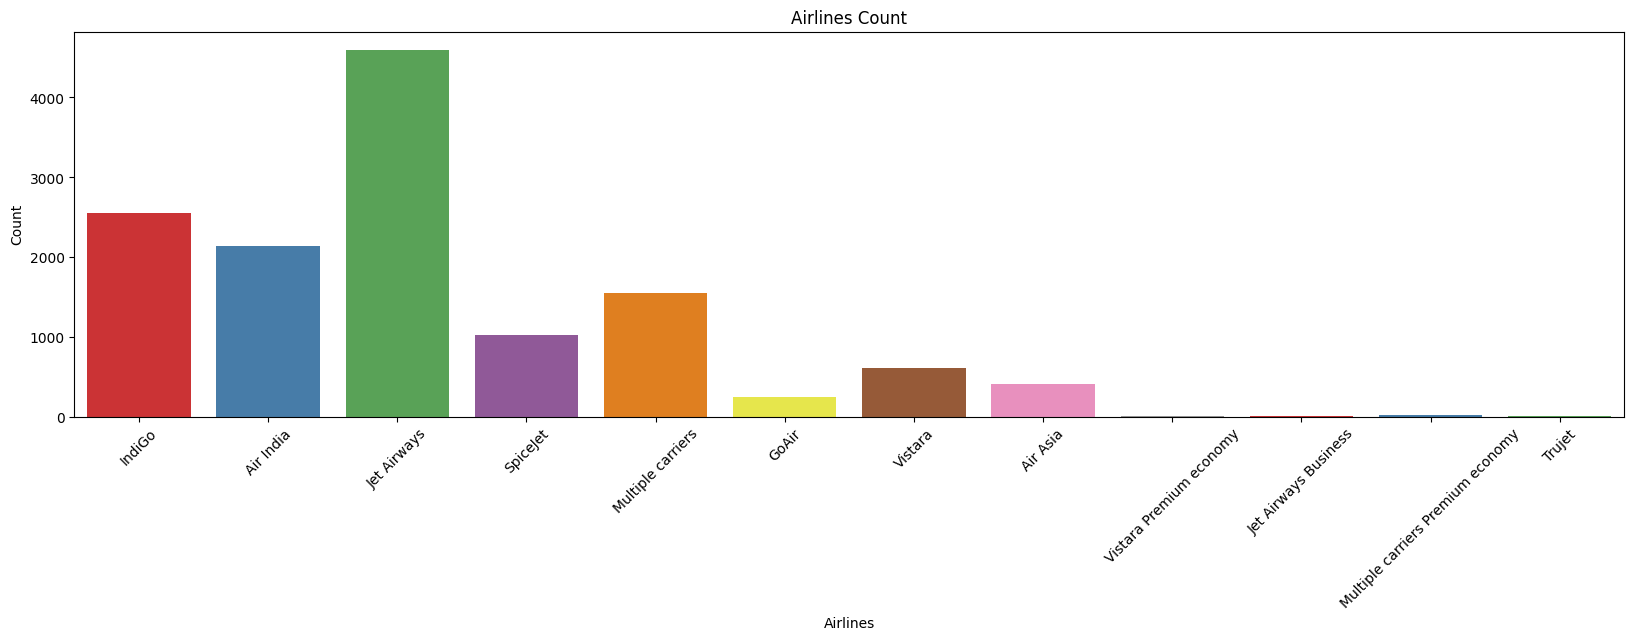

In [491]:
## Ploting count Vs Airlines
plt.figure(figsize = (20,5))
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.title('Airlines Count')
sns.countplot(x='Airline',data=final_df,palette='Set1')
plt.xticks(rotation=45)

Inference: Now from the above graph we can see that between the type pf airline and count of flights we can see that Jet airways has the most flight boarded.

In [492]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13133 entries, 0 to 13132
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13133 non-null  object 
 1   Source           13133 non-null  object 
 2   Destination      13133 non-null  object 
 3   Route            13133 non-null  object 
 4   Dep_Time         13133 non-null  object 
 5   Arrival_Time     13133 non-null  object 
 6   Duration         13133 non-null  object 
 7   Total_Stops      13133 non-null  object 
 8   Additional_Info  13133 non-null  object 
 9   Price            10462 non-null  float64
 10  Date             13133 non-null  int32  
 11  Month            13133 non-null  int32  
 12  Year             13133 non-null  int32  
 13  Arrival_hour     13133 non-null  object 
 14  Arrival_minute   13133 non-null  object 
dtypes: float64(1), int32(3), object(11)
memory usage: 1.4+ MB


In [493]:
# we have to convert it into integer type
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_minute']=final_df['Arrival_minute'].astype(int)

In [494]:
# Removing Arrival_Time column
final_df.drop('Arrival_Time',axis=1,inplace=True)

* create new columns'Dept_hour'  'Dept_min' from  'Dep_Time'
* Convert the data type into integer
* We remove the old Dep_Time column

In [495]:

final_df['Dept_hour']=final_df['Dep_Time'].apply(lambda x:x.split(':')[0])
final_df['Dept_min']=final_df['Dep_Time'].apply(lambda x:x.split(':')[1])
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)

In [496]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13133 entries, 0 to 13132
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13133 non-null  object 
 1   Source           13133 non-null  object 
 2   Destination      13133 non-null  object 
 3   Route            13133 non-null  object 
 4   Duration         13133 non-null  object 
 5   Total_Stops      13133 non-null  object 
 6   Additional_Info  13133 non-null  object 
 7   Price            10462 non-null  float64
 8   Date             13133 non-null  int32  
 9   Month            13133 non-null  int32  
 10  Year             13133 non-null  int32  
 11  Arrival_hour     13133 non-null  int32  
 12  Arrival_minute   13133 non-null  int32  
 13  Dept_hour        13133 non-null  int32  
 14  Dept_min         13133 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.2+ MB


In [497]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [498]:

final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [499]:
#finding number of null value present in this column
final_df['Total_Stops'].isnull().sum()

0

In [500]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min


#### Encoding

In [501]:

final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'NaN':0,'4 stops':4})

In [502]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [503]:
# We no need the column 'Route' because we have that kind of information in 'Total_Stops' column.
final_df.drop('Route',axis=1,inplace=True)

In [504]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [505]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [506]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13133 entries, 0 to 13132
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13133 non-null  object 
 1   Source           13133 non-null  object 
 2   Destination      13133 non-null  object 
 3   Duration         13133 non-null  object 
 4   Total_Stops      13133 non-null  int64  
 5   Additional_Info  13133 non-null  object 
 6   Price            10462 non-null  float64
 7   Date             13133 non-null  int32  
 8   Month            13133 non-null  int32  
 9   Year             13133 non-null  int32  
 10  Arrival_hour     13133 non-null  int32  
 11  Arrival_minute   13133 non-null  int32  
 12  Dept_hour        13133 non-null  int32  
 13  Dept_min         13133 non-null  int32  
dtypes: float64(1), int32(7), int64(1), object(5)
memory usage: 1.1+ MB


### Here We write a function to convert the 	Duration time into minute

In [507]:
## convert the duration into minute
def convert_to_minutes(duration_str):
    parts = duration_str.split()
    total_minutes = 0

    for part in parts:
        if 'h' in part:
            total_minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            total_minutes += int(part.replace('m', ''))

    return total_minutes

In [508]:
final_df['duration_in_minutes'] = final_df['Duration'].apply(convert_to_minutes)

In [509]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13128,Air India,Kolkata,Banglore,23h 55m,1,No info,NaN,6,6,2019,20,25,20,30,1435
13129,IndiGo,Kolkata,Banglore,2h 35m,0,No info,NaN,27,3,2019,16,55,14,20,155
13130,Jet Airways,Delhi,Cochin,6h 35m,1,No info,NaN,6,3,2019,4,25,21,50,395
13131,Air India,Delhi,Cochin,15h 15m,1,No info,NaN,6,3,2019,19,15,4,0,915


In [510]:
# We have to remove duration because we have durtion minute column
final_df.drop('Duration',axis=1,inplace=True)

In [511]:
final_df.isnull().sum()

Airline                   0
Source                    0
Destination               0
Total_Stops               0
Additional_Info           0
Price                  2671
Date                      0
Month                     0
Year                      0
Arrival_hour              0
Arrival_minute            0
Dept_hour                 0
Dept_min                  0
duration_in_minutes       0
dtype: int64

In [512]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes


In [513]:
final_df.loc[9039,'Total_Stops']=0


In [514]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes


In [515]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13133 entries, 0 to 13132
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13133 non-null  object 
 1   Source               13133 non-null  object 
 2   Destination          13133 non-null  object 
 3   Total_Stops          13133 non-null  int64  
 4   Additional_Info      13133 non-null  object 
 5   Price                10462 non-null  float64
 6   Date                 13133 non-null  int32  
 7   Month                13133 non-null  int32  
 8   Year                 13133 non-null  int32  
 9   Arrival_hour         13133 non-null  int32  
 10  Arrival_minute       13133 non-null  int32  
 11  Dept_hour            13133 non-null  int32  
 12  Dept_min             13133 non-null  int32  
 13  duration_in_minutes  13133 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(4)
memory usage: 1.1+ MB


In [516]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

### We can encode the  Columns with module LabelEncoder

In [517]:

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [518]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [519]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,445
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,1140
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,325
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,285


In [520]:
final_df.shape


(13133, 14)

In [521]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13133 entries, 0 to 13132
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13133 non-null  int32  
 1   Source               13133 non-null  int32  
 2   Destination          13133 non-null  int32  
 3   Total_Stops          13133 non-null  int64  
 4   Additional_Info      13133 non-null  int32  
 5   Price                10462 non-null  float64
 6   Date                 13133 non-null  int32  
 7   Month                13133 non-null  int32  
 8   Year                 13133 non-null  int32  
 9   Arrival_hour         13133 non-null  int32  
 10  Arrival_minute       13133 non-null  int32  
 11  Dept_hour            13133 non-null  int32  
 12  Dept_min             13133 non-null  int32  
 13  duration_in_minutes  13133 non-null  int64  
dtypes: float64(1), int32(11), int64(2)
memory usage: 872.2 KB


<Axes: >

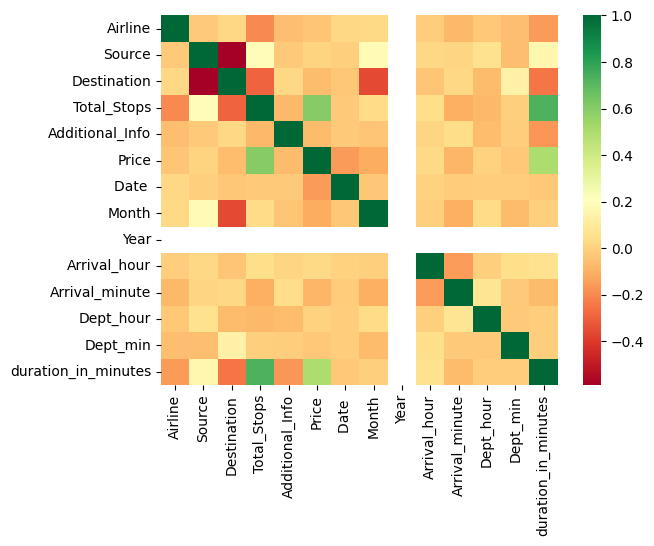

In [522]:
sns.heatmap(final_df.corr(),cmap="RdYlGn")

### Observation
##### Here Good Correlation Variables are:
1. Price - Total_stop
2. Price - duration_in_minutes
3. duraiton_in_minutes - Total_stop


In [523]:
data=final_df.drop(['Price'],axis=1)

In [524]:
train_categorical_data=data.select_dtypes(exclude=['int64','float','int32'])
train_categorical_data
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])
train_numerical_data

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes
0,3,0,5,0,8,24,3,2019,1,10,22,20,170
1,1,3,0,2,8,1,5,2019,13,15,5,50,445
2,4,2,1,2,8,9,6,2019,4,25,9,25,1140
3,3,3,0,1,8,12,5,2019,23,30,18,5,325
4,3,0,5,1,8,1,3,2019,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13128,1,3,0,1,8,6,6,2019,20,25,20,30,1435
13129,3,3,0,0,8,27,3,2019,16,55,14,20,155
13130,4,2,1,1,8,6,3,2019,4,25,21,50,395
13131,1,2,1,1,8,6,3,2019,19,15,4,0,915


## Now we will be splitting out our dataset


In [525]:
print(train_df.shape)
print(test_df.shape)
print(final_df.shape)
## bellow 10462+2671=13133

(10462, 11)
(2671, 10)
(13133, 14)
